# **Loading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IT7103/FinalProject/credit_score_cleanedData.csv')
data1

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.377861,268,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,24.797346,269,No,41.420155,High_spent_Medium_value_payments,341.48923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25FE9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,34.663570,378,No,60.971333,High_spent_Large_value_payments,479.86624,0
99996,0x25FEA,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,40.565630,379,No,54.185950,High_spent_Medium_value_payments,496.65160,0
99997,0x25FEB,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,41.255524,380,No,24.028477,High_spent_Large_value_payments,516.80910,0
99998,0x25FEC,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,33.638206,381,No,251.672580,Low_spent_Large_value_payments,319.16498,1


In [4]:
# To know about the count and the data type of each column

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

From the above information, there are no empty values for any of the columns. non-null counts matches to total no.of records on the file.

In [5]:
# To show the no of rows and columns in a dataframe

data1.shape

(100000, 28)

# **Splitting data into train data and test data**

Column **credit_score** is our target column. The credit_score has values 0, 1 and 2 which represents credit rating- low, medium and high respectively.

Columns such as- **id, customer_id, month, name and ssn** do not govern credit_score so they have been dropped.

In [6]:
from sklearn.model_selection import train_test_split

X = data1.drop(['id','customer_id','month','name','ssn','credit_score'],axis=1)
Y = data1['credit_score']


traindataX, testdataX, traindataY, testdataY = train_test_split(X, Y, test_size=0.25)

traindataX.shape, testdataX.shape, traindataY.shape, testdataY.shape

((75000, 22), (25000, 22), (75000,), (25000,))

In [7]:
# To know statistics of each column including mean, median, standard deviation etc.

traindataX.describe()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,amount_invested_monthly,monthly_balance
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000
mean,33.303333,50597.921634,4206.447826,107.167812,5.370120,5.533920,14.531880,3.529827,21.072200,13.334693,10.386062,5.767013,1424.477999,32.283376,221.26200,640.144245,403.019430
std,10.758164,38336.370604,3190.281270,130.735494,2.598188,2.070214,8.752723,2.444775,14.854305,6.271487,6.767184,3.855506,1152.624186,5.123075,99.56108,2046.626253,213.662501
min,14.000000,7005.930000,303.645420,0.000000,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.00000,0.000000,0.095482
25%,24.000000,19431.830000,1630.441900,29.268887,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.350000,3.000000,566.022500,28.039015,145.00000,74.823203,270.039423
50%,33.000000,37087.920000,3103.198200,66.540075,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,5.000000,1167.045000,32.295749,220.00000,136.188625,337.340425
75%,42.000000,71738.160000,5969.673300,146.701250,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.830000,8.000000,1942.400000,36.503141,302.00000,267.806845,472.441838
max,56.000000,179987.280000,15204.634000,3776.000000,11.000000,11.000000,34.000000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,404.00000,10000.000000,1602.040500


# **Visualising Columns**

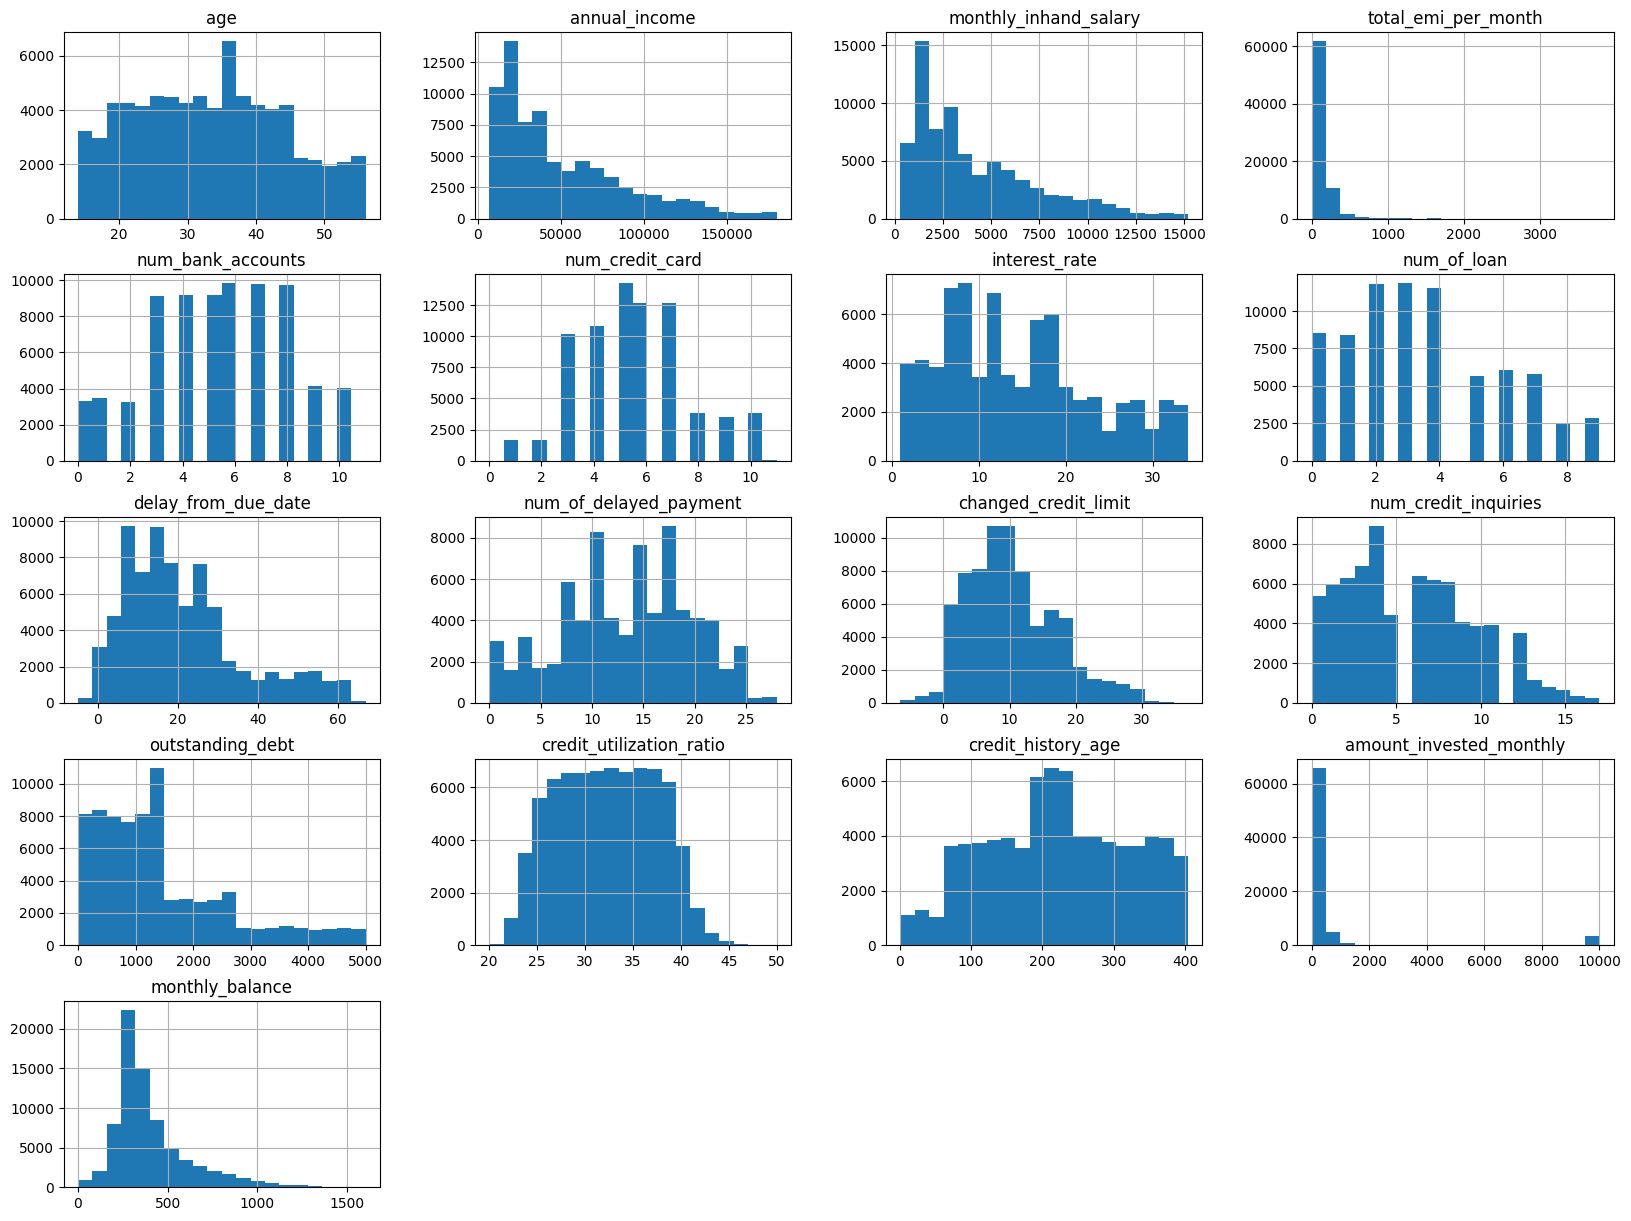

In [8]:
from matplotlib import pyplot as plt
traindataX.hist(bins=20, figsize=(20,15))
plt.show()

In the above histograms we see some of the data is skewed and couple of them are symmetrical like acceleration and model year

**Finding numerical columns from traindataX**

In [9]:
num_cols = [column for column in traindataX.columns if (traindataX[column].dtypes == np.int64) or (traindataX[column].dtypes == np.float64)]
num_cols

['age',
 'annual_income',
 'monthly_inhand_salary',
 'total_emi_per_month',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'num_credit_inquiries',
 'outstanding_debt',
 'credit_utilization_ratio',
 'credit_history_age',
 'amount_invested_monthly',
 'monthly_balance']

**Finding categorical data from traindataX**

In [10]:
cat_cols = [column for column in traindataX.columns if traindataX[column].dtypes == object]
cat_cols

['occupation',
 'type_of_loan',
 'credit_mix',
 'payment_of_min_amount',
 'payment_behaviour']

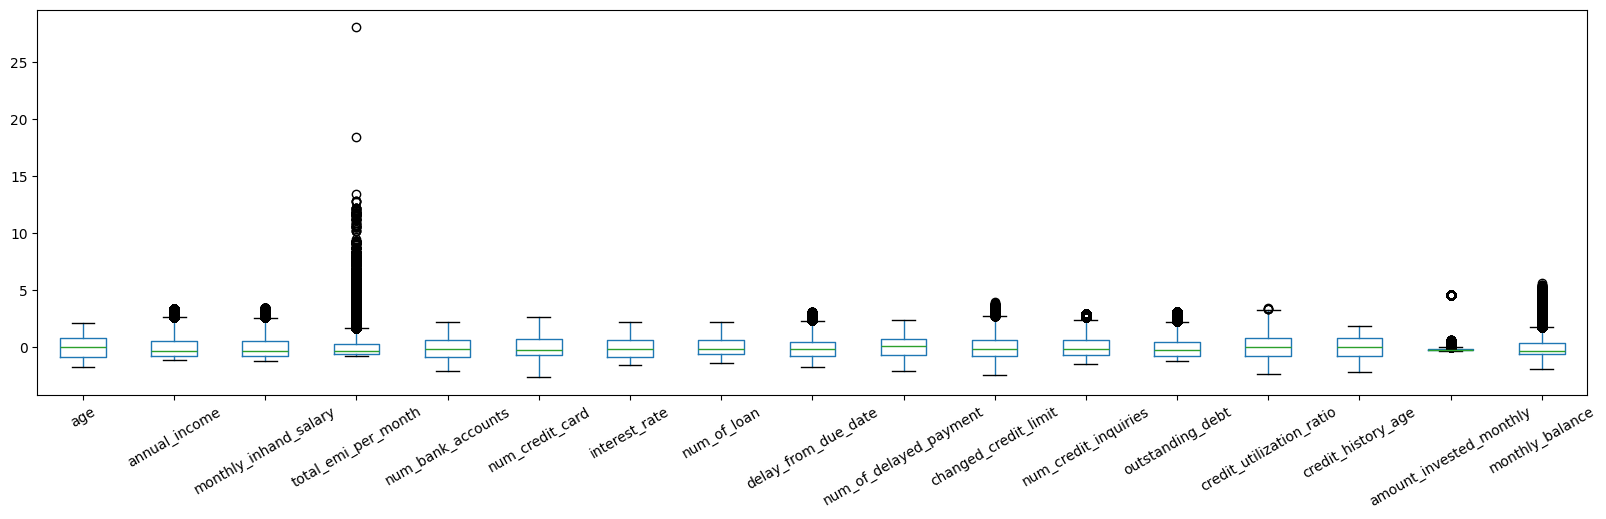

In [11]:
# Drawing box plot for all numerical columns

new = (traindataX[num_cols] - traindataX[num_cols].mean()) / traindataX[num_cols].std() # standardizes data around 0 and 1
new.boxplot(grid=False, figsize=(20,5), rot=30) # boxplot the columns
plt.show()

Through box plot, it is seen that total_emi_per_month and amount_invested_monthly have some outliers. We have to determine whether these outliers are due to errors or presence of any unusual case.


In [12]:
tepm = data1['total_emi_per_month']

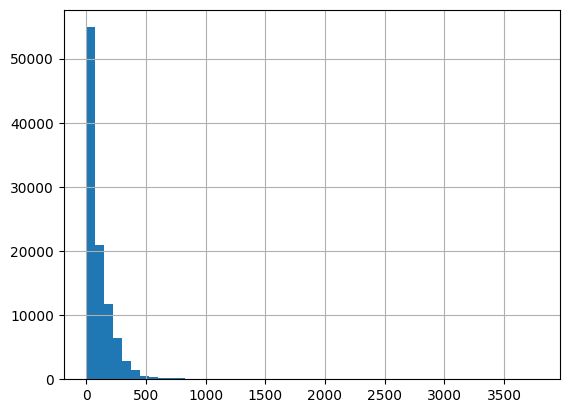

In [13]:
tepm.hist(bins=50)
plt.show()

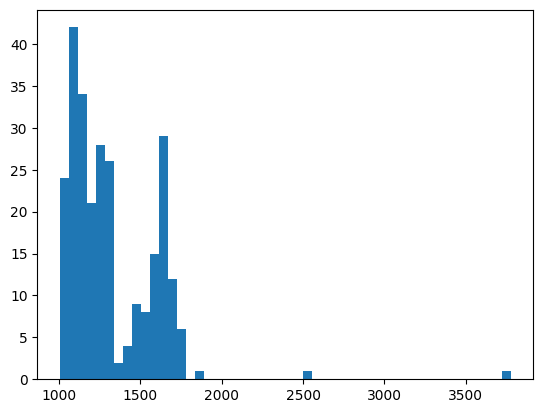

In [14]:
# Lets check the distribution for people having tepm > 1000

plt.hist(tepm[tepm>1000], bins=50)
plt.show()

In [15]:
# Lets check for people having tepm>2000

tepm[tepm>2000]

# Since there are only 2 people having tepm greater than 2000 hence theres no coded value
# This column is just skewed it has to undergo log transformation

,total_emi_per_month
15879,3776.0
60288,2523.0


In [16]:
aim = data1['amount_invested_monthly']

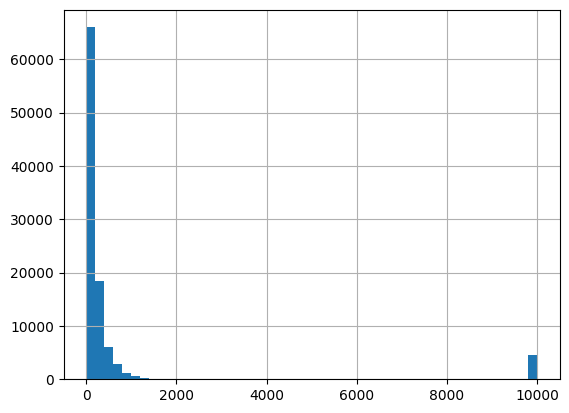

In [17]:
aim.hist(bins=50)
plt.show()

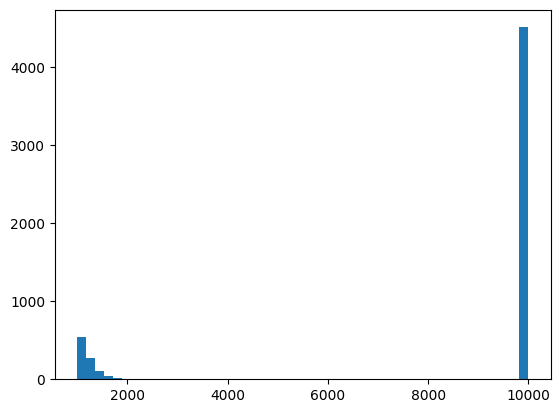

In [18]:
# Lets check the distribution for people having aim > 1000

plt.hist(aim[aim>1000], bins=50)
plt.show()

In [19]:
# Lets check for count of people having aim = 10000

aim[aim ==10000].value_counts()

,count
amount_invested_monthly,
10000.0,4507


Now repeating the above steps for the target column

In [20]:
traindataY.describe()

,credit_score
count,75000.000000
mean,0.888307
std,0.675098
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


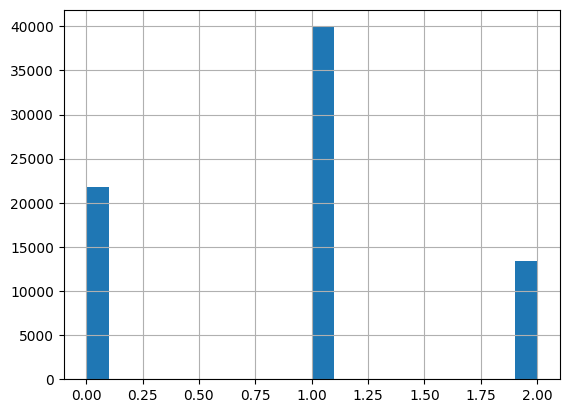

In [21]:
traindataY.hist(bins=20)
plt.show()

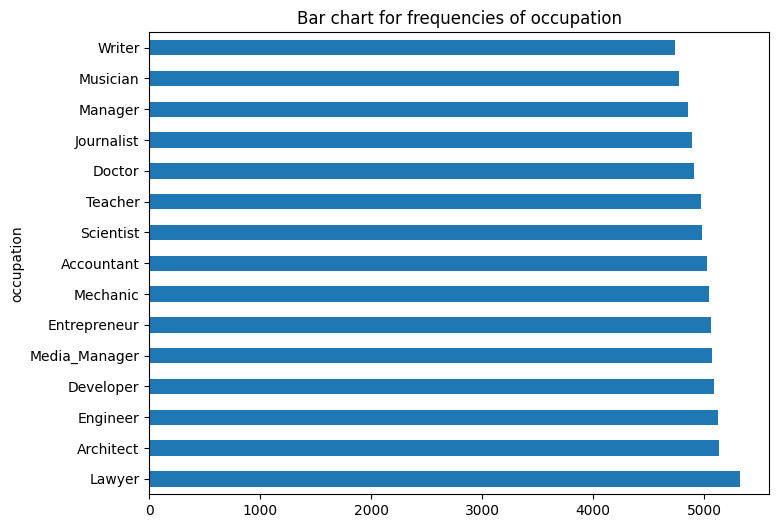


Showing top 50 categories for type_of_loan. There are more.


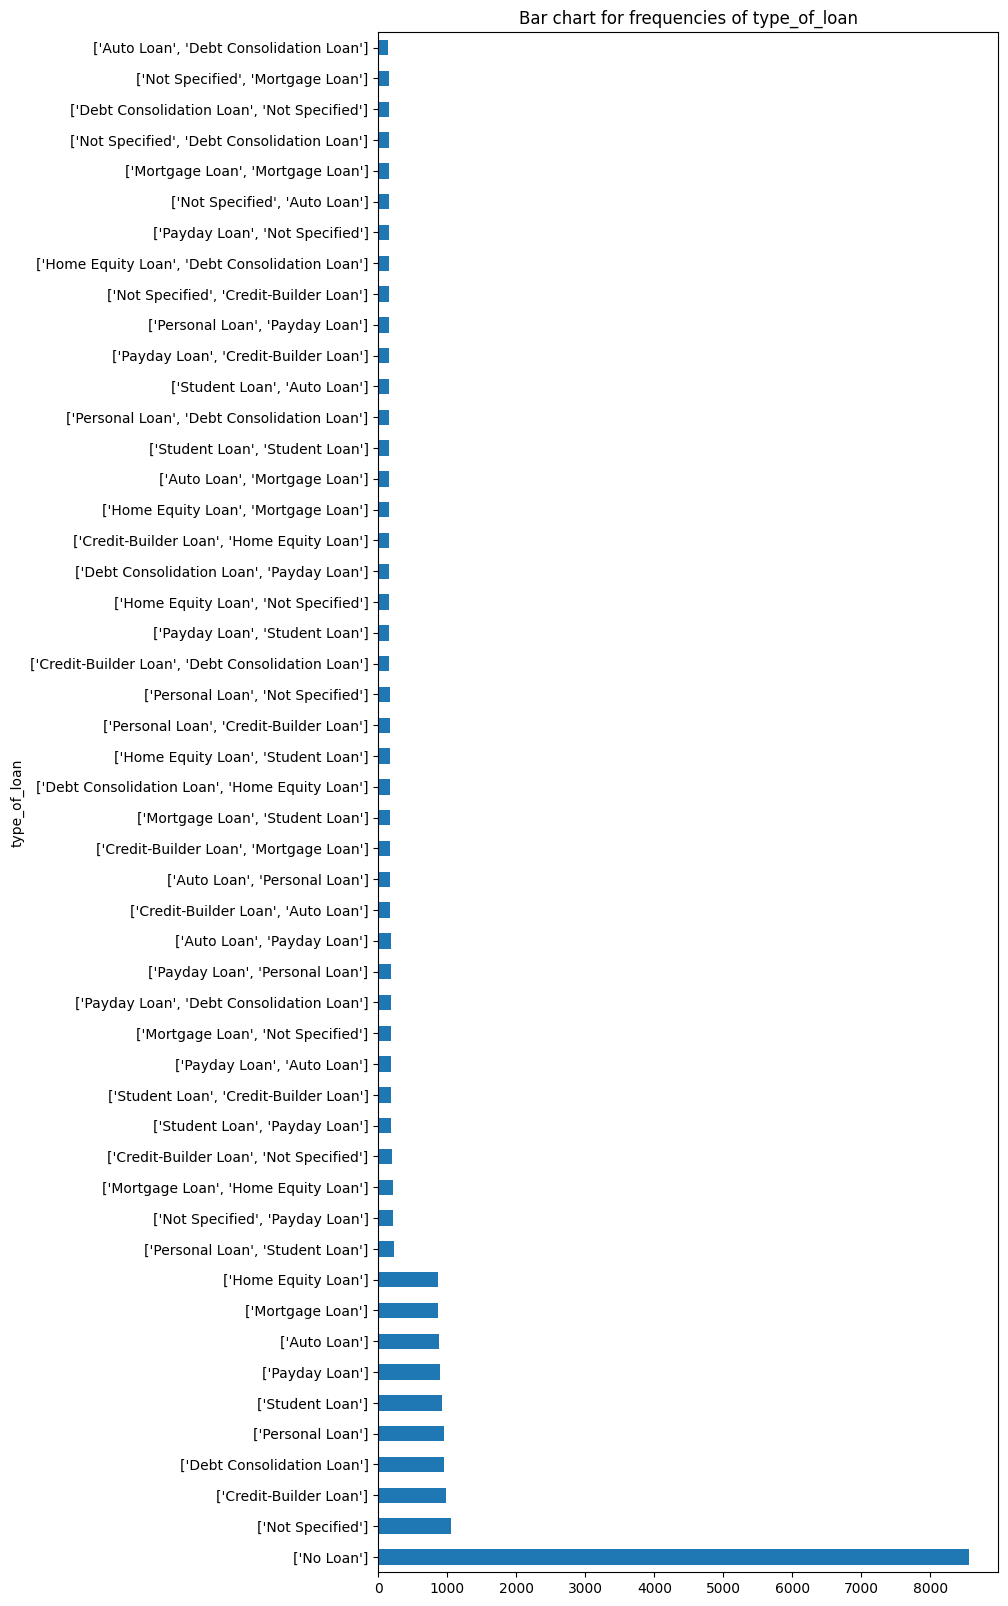

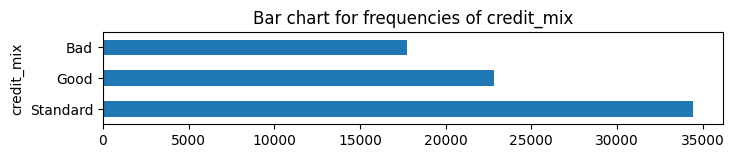

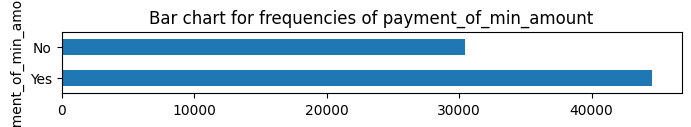

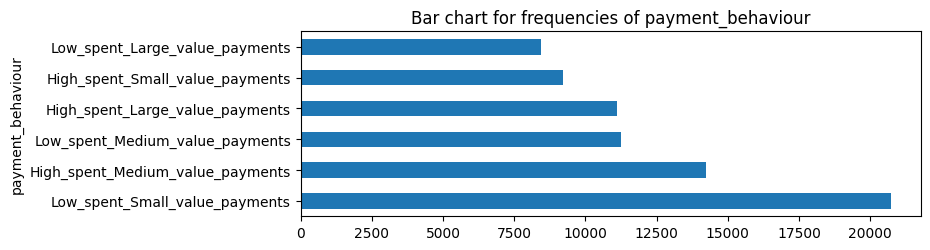

In [22]:
for col in cat_cols:
    freq_table = traindataX[col].value_counts()
    if len(freq_table) > 50:  # Adjust 50 as needed
        freq_table = freq_table[:50]  # Consider displaying top categories instead of all
        print(f"Showing top 50 categories for {col}. There are more.")
    plt.figure(figsize = (8,len(freq_table)*0.4)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

**Categorizing the columns**

In [23]:
# As seen from histogram the below columns had normal distribution so they have been categorized into num_cols
num_cols = ['age', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'num_of_delayed_payment', 'changed_credit_limit', 'credit_utilization_ratio', 'credit_history_age']

# The following columns were skewed as seen from histogram, hence they have to undergo log transformation, they have been classified into log_cols
log_cols = ['annual_income', 'monthly_inhand_salary', 'total_emi_per_month', 'delay_from_due_date','num_credit_inquiries','outstanding_debt','amount_invested_monthly', 'monthly_balance']

# The following columns had data type as object hence are categorized under cat_cols
cat_cols = ['occupation', 'type_of_loan', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

# The below is the target column
target = ['credit_score']

# **Data Preprocessing**

In [24]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


def remove_0(X):
    # Ensure all columns exist in X before accessing them
    for col in ['num_bank_accounts', 'num_credit_card', 'num_of_delayed_payment', 'changed_credit_limit']:
        if col in X.columns:
            X.loc[X[col]==0, col] = np.nan
    return X


num_pipeline = Pipeline([
    ('remove 0', FunctionTransformer(remove_0, validate=False)),                      #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                                     #this step will impute missing values using column medians
    ('standardize', StandardScaler())                                                 #this step will scale all numeric columns
])

def log_transformation(x):
    x_clipped = np.clip(x, a_min=1e-8, a_max=None)
    return np.log(x_clipped)


def remove_0_log(X):
    # Ensure all columns exist in X before accessing them
    for col in ['delay_from_due_date', 'num_credit_inquiries','amount_invested_monthly']:
        if col in X.columns:
            X.loc[X[col]==0, col] = np.nan
    return X

log_pipeline = Pipeline([
     ('remove 0 log', FunctionTransformer(remove_0_log, validate=False)),                                    #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])



Decision Tree Model Accuracy: 71.18%


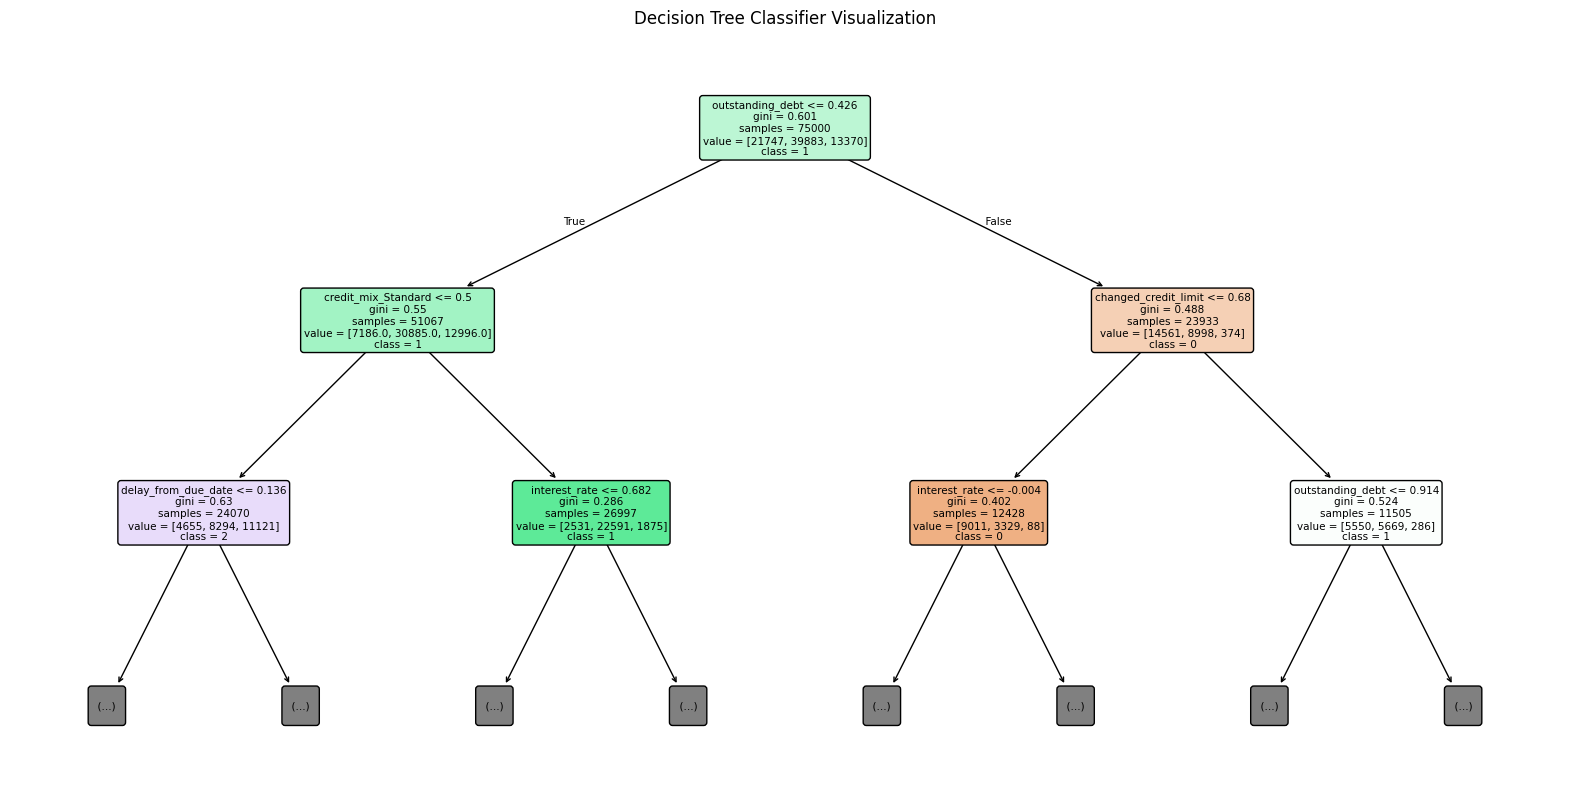

Decision Tree Model F1 Score: 0.71


In [25]:
from sklearn.metrics import f1_score


dt_pipeline = Pipeline([
    ('preprocessor', processing_pipeline),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5))  # Limit tree depth to 5
])

# Train the Decision Tree model
dt_pipeline.fit(traindataX, traindataY)

# Evaluate the model on the test set
accuracy = dt_pipeline.score(testdataX, testdataY)
print(f"Decision Tree Model Accuracy: {accuracy * 100:.2f}%")

# Extract feature names from the column transformer
numeric_features = num_cols
log_features = log_cols
# Get the feature names after OneHotEncoding from the ColumnTransformer
cat_features = list(dt_pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out(cat_cols))

# Combine all feature names
all_feature_names = numeric_features + log_features + cat_features

# Visualize the Decision Tree with a limited depth
plt.figure(figsize=(20,10))
plot_tree(dt_pipeline.named_steps['classifier'],
          feature_names=all_feature_names,  # Corrected feature names
          class_names=np.unique(Y).astype(str),
          filled=True,
          rounded=True,
          max_depth=2)  # You can adjust the max_depth here for better visualization
plt.title("Decision Tree Classifier Visualization")
plt.show()

# Get predictions for the test dataset
test_predictions = dt_pipeline.predict(testdataX)

# Calculate the F1 score
f1 = f1_score(testdataY, test_predictions, average='weighted')  # Use 'weighted' to handle class imbalance
print(f"Decision Tree Model F1 Score: {f1:.2f}")

Accuracy of Naive Bayes model: 0.51


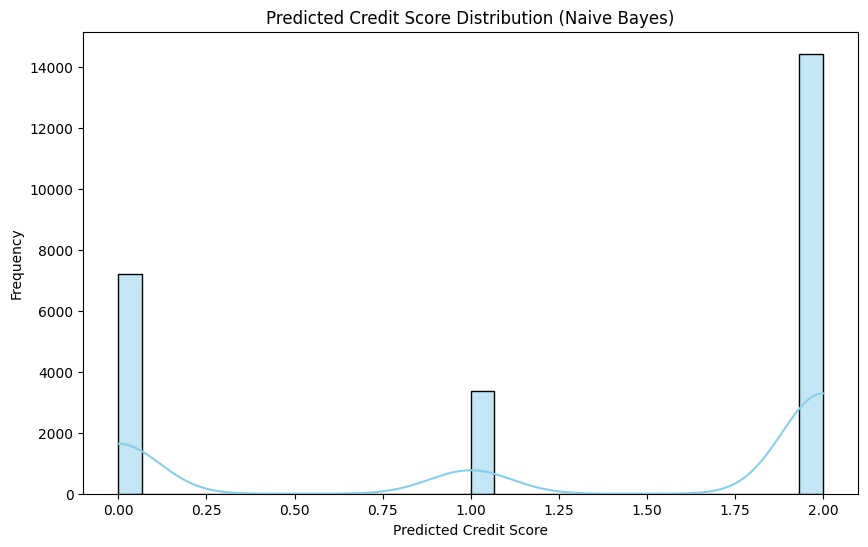

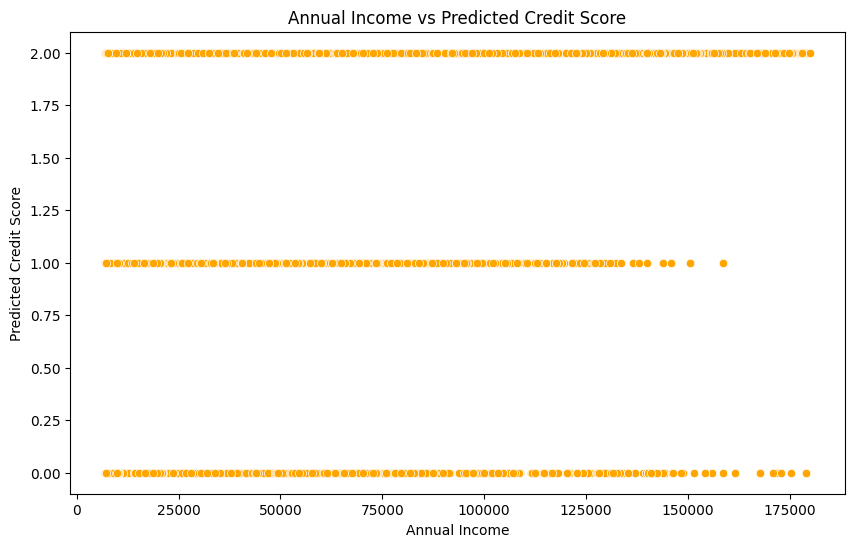

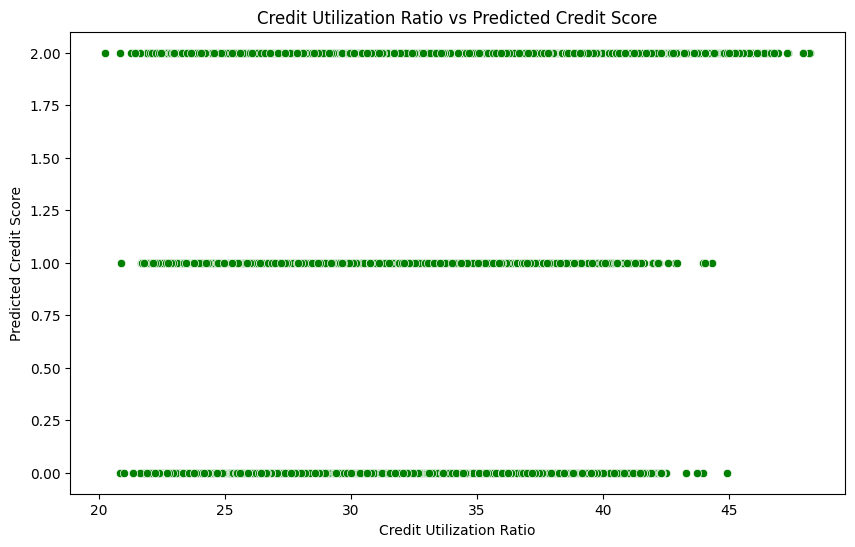

Naive Bayes Model F1 Score: 0.49


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(traindataX[cat_cols])  # Fit on training data

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', encoder, cat_cols)
    ])

# Creating a Naive Bayes model
nb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

nb_model.fit(traindataX, traindataY)

predictions = nb_model.predict(testdataX)

accuracy = accuracy_score(testdataY, predictions)
print(f"Accuracy of Naive Bayes model: {accuracy:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(predictions, kde=True, bins=30, color='skyblue')
plt.title('Predicted Credit Score Distribution (Naive Bayes)')
plt.xlabel('Predicted Credit Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=testdataX['annual_income'], y=predictions, color='orange')
plt.title('Annual Income vs Predicted Credit Score')
plt.xlabel('Annual Income')
plt.ylabel('Predicted Credit Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=testdataX['credit_utilization_ratio'], y=predictions, color='green')
plt.title('Credit Utilization Ratio vs Predicted Credit Score')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Predicted Credit Score')
plt.show()

nb_predictions = nb_model.predict(testdataX)

# Calculate the F1 score
f1_nb = f1_score(testdataY, nb_predictions, average='weighted')  # Use 'weighted' to handle class imbalance
print(f"Naive Bayes Model F1 Score: {f1_nb:.2f}")